In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31', progress=False)

YF.download() has changed argument auto_adjust default to True



1 Failed download:
['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [3]:
sp500

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,


In [4]:
prices = sp500['Close']

In [5]:
prices.iloc[1]

IndexError: single positional indexer is out-of-bounds

In [ ]:
# scaled_prices = []

# for i in range(len(prices)):
#     x = prices.squeeze().iloc[i]
#     y = (x - prices.squeeze().min()) / (prices.squeeze().max() - prices.squeeze().min())
#     scaled_prices.append(y)

In [ ]:
# log_returns = []

# for i in range(1,len(prices)):
#     x = np.log(prices.squeeze().iloc[i]) - np.log(prices.squeeze().iloc[i-1])
#     log_returns.append(x)

# log_returns.insert(0,0)

In [ ]:
smooth_prices = []
smooth_prices.append(prices.squeeze().iloc[1])
alpha = 2/5

for i in range(2, len(prices)):
    x = prices.squeeze().iloc[i]
    y = smooth_prices[-1]
    z = prices.squeeze().iloc[i-2]

    p = alpha * (x + (0.5 * (x-z))) + (1-alpha) * y
    smooth_prices.append(p)

In [ ]:
smooth_prices

In [ ]:
X = pd.DataFrame({
    'SPrices': smooth_prices
    # 'Close Prices': prices.squeeze(),
    # 'Log Returns': log_returns,
    # 'Scaled Prices': scaled_prices
})

X['PCT'] = X['SPrices'].pct_change() * 100
X['PCT-1'] = X['PCT'].shift(1)
X['PCT-2'] = X['PCT'].shift(2)
X['PCT-3'] = X['PCT'].shift(3)
X['PCT-4'] = X['PCT'].shift(4)
X['PCT-5'] = X['PCT'].shift(5)
X['PCT-6'] = X['PCT'].shift(6)
X['PCT-7'] = X['PCT'].shift(7)

X = X.dropna()
X

In [ ]:
Data = pd.DataFrame()

Data['PCT today'] = X['PCT']
Data['PCT today-1'] = X['PCT-1']
Data['PCT today-2'] = X['PCT-2']
Data['PCT today-3'] = X['PCT-3']
Data['PCT today-4'] = X['PCT-4']
Data['PCT today-5'] = X['PCT-5']
Data['PCT today-6'] = X['PCT-6']
Data['PCT today-7'] = X['PCT-7']

Data = Data.dropna()
Data

In [ ]:
InputData = Data.drop('PCT today',axis='columns')
InputData

In [ ]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

In [ ]:
# Single layer perceptron

# np.random.seed(42)
np.random.seed(48)

ninputs = 7
noutput = 1

weights = np.random.uniform(-1, 1, (ninputs, noutput))
bias = np.random.uniform(-1, 1, (noutput, noutput))

learning_rate = 0.0002
# learning_rate = 0.005
epochs = 101

k = 0.00025
T = 253

arr = np.arange(1,101)
SRarr = []

for epoch in range(1,epochs):
    
    allocations = np.zeros(len(InputData))
    net_input = np.zeros(len(InputData))
        
    for i in range(1,len(InputData) + 1):
        current_input = InputData.iloc[i-1]
        
        # Forward pass
        output_input = np.dot(current_input, weights) + bias
        output = tanh(output_input)
        net_input[i-1] = output_input.item()
        allocations[i-1] = output.item()

    # Calculation for Asset Returns and Mu
    asset_returns = allocations * Data['PCT today'].values
    average_daily_return = np.mean(asset_returns)
    average_daily_excess_return = average_daily_return - k
    
    # Calculation of Standard deviation
    squared_deviations = np.square(asset_returns - average_daily_excess_return)
    sigma = np.sqrt(np.mean(squared_deviations))
    
    # Annulaized Sharpe Ratio
    annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
    SRarr.append(annualized_SR)

    # Select random pattern
    num = np.random.randint(0, len(InputData))
    
    # Update weights per pattern    
    # Backpropagation
    a = np.sqrt(T) / sigma
    b = average_daily_excess_return / sigma
    c = (asset_returns[num] - (average_daily_excess_return + k)) / sigma
            
    Ct = a * (1 - (b * c))
                
    beta_output = Ct * Data['PCT today'].iloc[num] * tanh_derivative(allocations[num]) * net_input[num]
            
    weights += learning_rate * beta_output
    bias += learning_rate * beta_output

    if epoch % 50 == 0:
        print(f"Epoch {epoch}")
        print(f"Gradient: {beta_output}, Weight Update: {learning_rate * beta_output}, Ct: {Ct}")
        print(f"Weights: {weights}, Bias: {bias}")
        print(f"Allocations: {allocations}, Net_Input: {net_input}")
        print(f"Asset Returns: {asset_returns}, Average Daily Excess Return: {average_daily_excess_return}")
        print(f"Sigma: {sigma}, Annualized SR: {annualized_SR}")

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(arr, SRarr)
plt.xlabel("Epochs")
plt.ylabel("Annualized Sharpe Ratio")
plt.title("ASR per epoch")
plt.show()

In [15]:
test = yf.download('^GSPC', start='2023-01-01', end='2024-12-31', progress=False)
test_prices = test['Close']

In [16]:
test_scaled_prices = []

for i in range(len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = (x - test_prices.squeeze().min()) / (test_prices.squeeze().max() - test_prices.squeeze().min())
    test_scaled_prices.append(y)

In [17]:
test_log_returns = []

for i in range(1,len(test_prices)):
    x = np.log(test_prices.squeeze().iloc[i]) - np.log(test_prices.squeeze().iloc[i-1])
    test_log_returns.append(x)

test_log_returns.insert(0,0)

In [18]:
test_smooth_prices = []
test_smooth_prices.append(test_prices.squeeze().iloc[1])
test_alpha = 2/5

for i in range(2, len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = test_smooth_prices[-1]
    z = test_prices.squeeze().iloc[i-2]

    p = test_alpha * (x + (0.5 * (x-z))) + (1-test_alpha) * y
    test_smooth_prices.append(p)

In [19]:
test_X = pd.DataFrame({
    'SPrices': test_smooth_prices,
    'Close Prices': test_prices.squeeze()[1:],
    # 'Log Returns': test_log_returns,
    # 'Scaled Prices': test_scaled_prices
})

test_X['PCT'] = test_X['SPrices'].pct_change() * 100
test_X['PCT-1'] = test_X['PCT'].shift(1)
test_X['PCT-2'] = test_X['PCT'].shift(2)
test_X['PCT-3'] = test_X['PCT'].shift(3)
test_X['PCT-4'] = test_X['PCT'].shift(4)
test_X['PCT-5'] = test_X['PCT'].shift(5)
test_X['PCT-6'] = test_X['PCT'].shift(6)
test_X['PCT-7'] = test_X['PCT'].shift(7)

test_X = test_X.dropna()
test_X

,SPrices,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
Date,,,,,,,,,,
2023-01-17,3992.286035,3990.969971,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,-0.549081
2023-01-18,3952.869668,3928.860107,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221
2023-01-19,3912.837865,3898.850098,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268
2023-01-20,3945.496762,3972.610107,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306
2023-01-23,3999.414073,4019.810059,1.366553,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5957.033674,5974.069824,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424
2024-12-24,6012.074208,6040.040039,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004
2024-12-26,6034.984466,6037.589844,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182


In [20]:
test_Data = pd.DataFrame()

test_Data['Close Prices'] = test_X['Close Prices']
test_Data['SPrices'] = test_X['SPrices']
test_Data['PCT today'] = test_X['PCT']
test_Data['PCT today-1'] = test_X['PCT-1']
test_Data['PCT today-2'] = test_X['PCT-2']
test_Data['PCT today-3'] = test_X['PCT-3']
test_Data['PCT today-4'] = test_X['PCT-4']
test_Data['PCT today-5'] = test_X['PCT-5']
test_Data['PCT today-6'] = test_X['PCT-6']
test_Data['PCT today-7'] = test_X['PCT-7']

test_Data = test_Data.dropna()

test_Data

,Close Prices,SPrices,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
Date,,,,,,,,,,
2023-01-17,3990.969971,3992.286035,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,-0.549081
2023-01-18,3928.860107,3952.869668,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221
2023-01-19,3898.850098,3912.837865,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268
2023-01-20,3972.610107,3945.496762,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306
2023-01-23,4019.810059,3999.414073,1.366553,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,5957.033674,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424
2024-12-24,6040.040039,6012.074208,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004
2024-12-26,6037.589844,6034.984466,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182


In [21]:
input_test_data = test_Data.drop(columns=['Close Prices', 'PCT today', 'SPrices'])

Final Portfolio Value: 719131.0751953125
Shares Held: 121
Cash: 4391.34228515625


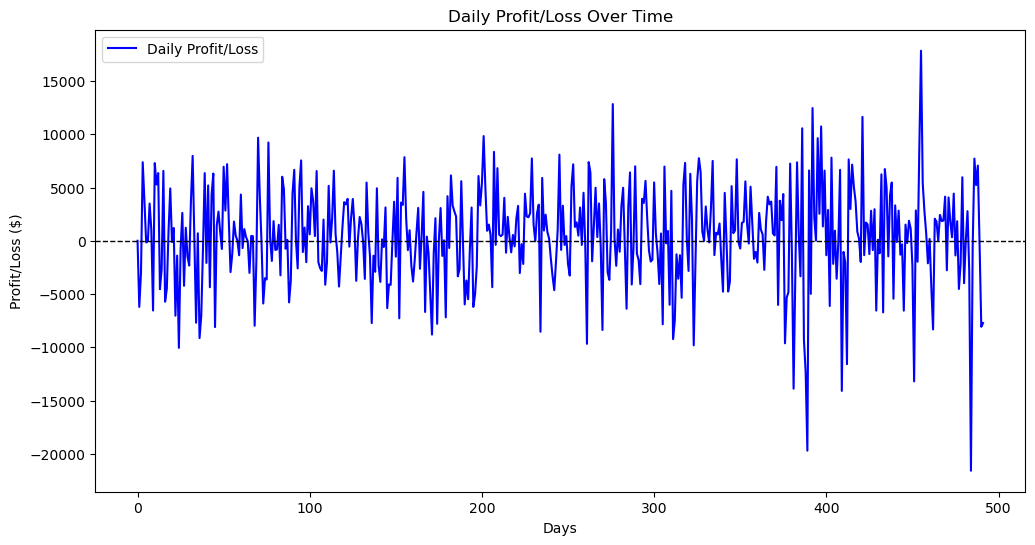

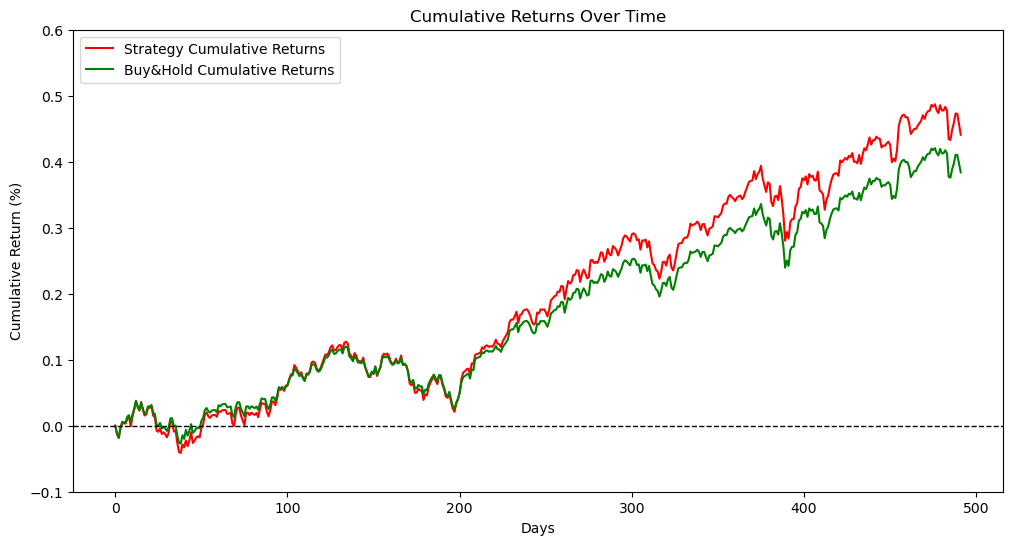

In [22]:
# Initialize tracking variables
portfolio_values = []
profits = []
cumulative_returns = []
allocations = []

# Initialize portfolio
initial_shares = 100
initial_cash = 100000  # Start with no cash
portfolio_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash  # Initial portfolio value
trading_capital = 0.2 * portfolio_value  # 20% of portfolio value for trading
shares_held = initial_shares
cash = initial_cash

cumulative_returns.append(0)
portfolio_values.append(portfolio_value)
profits.append(0)

buy_and_hold_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash
buy_and_hold_cumulative_returns = []
buy_and_hold_cumulative_returns.append(0)

# tradesInfo = [
#     {"Type": 'long', "Price": test_Data['Close Prices'].iloc[0], "Position Size": 100}
# ]

# Trading simulation
for i in range(1,len(input_test_data)):
    current_price = test_Data['Close Prices'].iloc[i]
    current_input = input_test_data.iloc[i]  # Features for the current day
    
    # Forward pass to get allocation
    output_input = np.dot(current_input, weights) + bias
    allocation = np.tanh(output_input).item()  # Model's allocation for the day
    allocations.append(allocation)

    # Recalculate trading capital dynamically
    # trading_capital = 0.2 * portfolio_value

    # Trading logic with risk management
    if allocation > 0.6:  # Buy signal    # 0.6
        # Calculate the number of shares to buy, ensuring cash does not go negative
        max_shares_to_buy = int(cash / current_price) if cash > 0 else 0
        shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
        cost = shares_to_buy * current_price
        
        # Update portfolio
        shares_held += shares_to_buy
        cash -= cost

        # Track Trades
        
        # if shares_to_buy > 0:
        #     tradesInfo.append({"Type": 'long', "Price": current_price, "Position Size": shares_to_buy})
    
    elif allocation < -0.8:  # Sell signal   # -0.8
        # Calculate the number of shares to sell
        shares_to_sell = int((trading_capital * abs(allocation)) / current_price)
        shares_to_sell = min(shares_to_sell, shares_held)  # Cannot sell more than held
        revenue = shares_to_sell * current_price
        
        # Update portfolio
        shares_held -= shares_to_sell
        cash += revenue

        # # Track Trades
        # if shares_to_sell > 0:
        #     tradesInfo.append({"Type": 'short', "Price": current_price, "Position Size": shares_to_sell})

    # Update portfolio value
    new_portfolio_value = shares_held * current_price + cash
    daily_profit = new_portfolio_value - portfolio_values[i-1]  # Profit on this day
    portfolio_values.append(new_portfolio_value)
    profits.append(daily_profit)

    # Calculate cumulative return
    cumulative_returns.append((new_portfolio_value / portfolio_values[0]) - 1)
    buy_and_hold_cumulative_returns.append(((initial_shares * current_price + initial_cash) / buy_and_hold_value) - 1)
    
    # Update portfolio value
    portfolio_value = new_portfolio_value

# Final portfolio value
print(f"Final Portfolio Value: {portfolio_value}")
print(f"Shares Held: {shares_held}")
print(f"Cash: {cash}")

# Plot daily profits
plt.figure(figsize=(12, 6))
plt.plot(profits, label="Daily Profit/Loss", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero-profit line
plt.xlabel("Days")
plt.ylabel("Profit/Loss ($)")
plt.title("Daily Profit/Loss Over Time")
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Strategy Cumulative Returns", color="red")
plt.plot(buy_and_hold_cumulative_returns, label="Buy&Hold Cumulative Returns", color="green")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
plt.ylim(-0.1,0.6)
plt.xlabel("Days")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend(loc="upper left")
plt.show()

# Plot buy and hold
# plt.figure(figsize=(12, 6))
# plt.plot(buy_and_hold_cumulative_returns, label="Cumulative Returns", color="green")
# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
# plt.ylim(-0.1,0.6)
# plt.xlabel("Days")
# plt.ylabel("Cumulative Return (%)")
# plt.title("Buy and Hold Cumulative Returns Over Time")
# plt.legend()
# plt.show()

In [23]:
# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate average daily return
average_daily_return = np.mean(daily_returns)

# Calculate standard deviation of daily returns
std_dev_daily_returns = np.std(daily_returns)

# Annualize the average daily return and standard deviation
annualized_return = average_daily_return * 253
annualized_std_dev = std_dev_daily_returns * np.sqrt(253)

# Risk-free rate
risk_free_rate = 0.0002

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 1.586044832912313


In [24]:
# tradesInfo

In [25]:
# pnlTrack = []

# for i in range(len(tradesInfo)):
#     if tradesInfo[i]['Type'] == 'long':
#         for j in range(i+1,len(tradesInfo)):
#             if tradesInfo[j]['Type'] == 'short':
#                 pnlTrack.append((tradesInfo[j]['Price'] - tradesInfo[i]['Price']) * tradesInfo[j]['Position Size'])
#                 break

#     else:
#         for j in range(i+1,len(tradesInfo)):
#             if tradesInfo[j]['Type'] == 'long':
#                 pnlTrack.append((tradesInfo[i]['Price'] - tradesInfo[j]['Price']) * tradesInfo[i]['Position Size'])
#                 break

In [26]:
sum(profits)

220034.078125

In [27]:
# sum(allocations)

In [28]:
# min(allocations)

In [29]:
# max(allocations)

In [30]:
allocations

[-0.01168029624476687,
 -0.3000870202088702,
 -0.8726706000905426,
 -0.9867002667208367,
 -0.4201909534945496,
 0.9812942208011487,
 0.9967399217158206,
 0.962395548329619,
 0.540545583807252,
 -0.2871335860244423,
 -0.8030872984675224,
 -0.2206143259911211,
 0.5495141140570144,
 0.9601493625789232,
 0.8626053781997737,
 -0.33379756237548885,
 -0.8123160290019942,
 -0.7514439061138027,
 -0.5604382454974685,
 0.06722543256879558,
 0.8889783758103469,
 0.9230505757574947,
 0.9816399516162928,
 0.6811439125608088,
 -0.4039167309676127,
 -0.9376519403698704,
 -0.640138411064158,
 0.8428011566746464,
 0.9812663097944644,
 0.9863120556171517,
 0.9745385797507382,
 0.8132853463260391,
 0.6145379945989328,
 0.981233325950093,
 0.9898205141168117,
 0.6345721272257449,
 -0.3567095565549546,
 -0.9395308808810111,
 -0.9622368552365731,
 -0.5477397460480924,
 0.9917345798703306,
 0.9963103159818396,
 0.999522170662645,
 0.9776088883784939,
 0.5104334762853994,
 0.41105467629984965,
 0.2281937837325

In [31]:
# buy_and_hold_cumulative_returns

In [32]:
# # Calculation for Asset Returns and Mu
# asset_returns = allocations * test_Data['PCT today'][1:].values
# average_daily_return = np.mean(asset_returns)
# average_daily_excess_return = average_daily_return - k
    
# # Calculation of Standard deviation
# squared_deviations = np.square(asset_returns - average_daily_excess_return)
# sigma = np.sqrt(np.mean(squared_deviations))
    
# # Annulaized Sharpe Ratio
# annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
# print(f"Annualized Sharpe Ratio: {annualized_SR}")